In [1]:
import numpy as np
import pandas as pd
import csv

In [1]:
# df = pd.DataFrame({'puzzle':[], 'mean_givens':[], 'min_givens':[], 'max_givens':[]})
# df = df[['puzzle', 'mean_givens', 'min_givens', 'max_givens']]
dims = [2, 3, 4]
N = 9998
ind = 0

for dim in dims:
    print('-----------------------------------')
    print('Puzzle size {}x{}'.format(dim, dim))
    xx = dim ** 4
    yy = dim ** 2
    puzzles = np.zeros((N, xx), np.int32)
    solutions = np.zeros((N, xx), np.int32)
    for i, line in enumerate(open('../resources/sudoku_{}_save.csv'.format(dim), 'r').read().splitlines()[1:N + 1]):
        puzzle, solution = line.split(",")
        for j, q_s in enumerate(zip(puzzle.split(' '), solution.split(' '))):
            q, s = q_s[0], q_s[1]
            puzzles[i, j] = q
            solutions[i, j] = s
    puzzles = puzzles.reshape((-1, yy, yy))
    solutions = solutions.reshape((-1, yy, yy))
    
    givens = []
    for puzzle in puzzles:
        p = puzzle.tolist()
        counter = 0
        for i in np.arange(1, yy+1):
            for j in np.arange(1, yy+1):
                if p[i-1][j-1] != 0:
                    counter += 1
        givens.append(counter)
    givens = np.array(givens)
    
    print('Cells: {}'.format(dim**4))
    print('Givens mean: {}'.format(givens.mean()))
    print('Ratio: {}'.format(givens.mean()/(dim**4)))
    print('Stdev: {}'.format(givens.std()))
    print('Givens min: {}'.format(givens.min()))
    print('Givens max: {}'.format(givens.max()))
    
    print('-----------------------------------')  
    
#     df.loc[ind] = [dim, givens.mean(), givens.min(), givens.max()]
#     ind += 1

-----------------------------------
Puzzle size 2x2


NameError: name 'np' is not defined

In [74]:
dim5 = 5
N = 5000
xx = dim5 ** 4
yy = dim5 ** 2
puzzles = np.zeros((N, xx), np.int32)
solutions = np.zeros((N, xx), np.int32)
for i, line in enumerate(open('../resources/sudoku_{}_save.csv'.format(dim5), 'r').read().splitlines()[1:N + 1]):
    puzzle, solution = line.split(",")
    for j, q_s in enumerate(zip(puzzle.split(' '), solution.split(' '))):
        q, s = q_s[0], q_s[1]
        puzzles[i, j] = q
        solutions[i, j] = s
puzzles = puzzles.reshape((-1, yy, yy))
solutions = solutions.reshape((-1, yy, yy))

givens = []
for puzzle in puzzles:
    p = puzzle.tolist()
    counter = 0
    for i in np.arange(1, yy+1):
        for j in np.arange(1, yy+1):
            if p[i-1][j-1] != 0:
                counter += 1
    givens.append(counter)
givens = np.array(givens)

print('-----------------------------------')
print('Puzzle size {}x{}'.format(dim5, dim5))
print('Cells: {}'.format(dim5**4))
print('Givens mean: {}'.format(givens.mean()))
print('Ratio: {}'.format(givens.mean()/(dim5**4)))
print('Stdev: {}'.format(givens.std()))
print('Givens min: {}'.format(givens.min()))
print('Givens max: {}'.format(givens.max()))
print('-----------------------------------\n') 

-----------------------------------
Puzzle size 5x5
Cells: 625
Givens mean: 293.0396
Ratio: 0.46886336
Stdev: 9.598980770894377
Givens min: 273
Givens max: 320
-----------------------------------



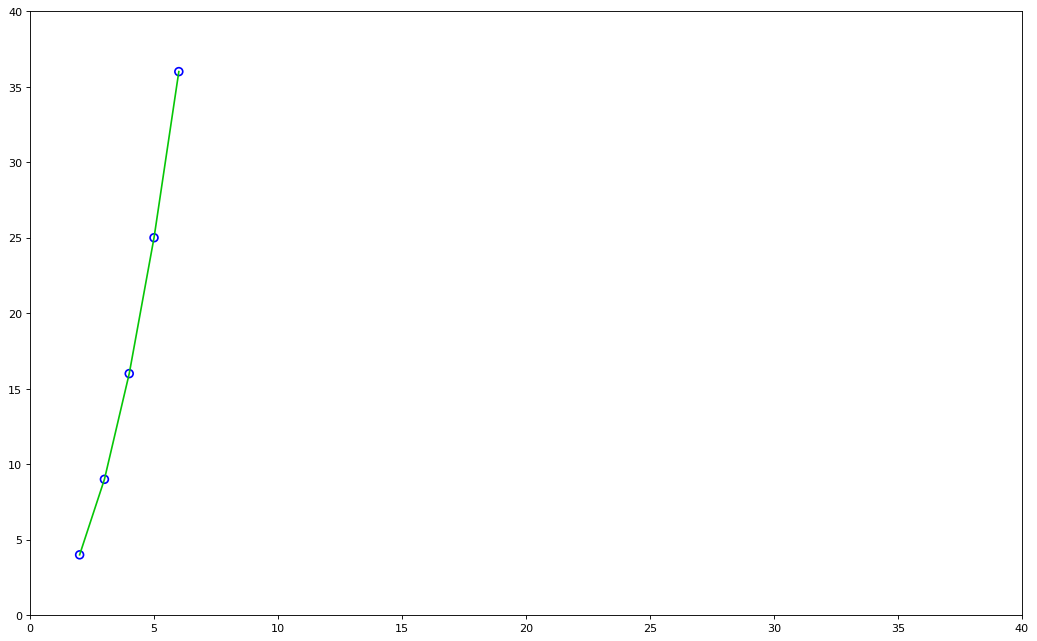

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(2,7)
x2 = x**2
fig = plt.figure(figsize=(16, 10), dpi=80)

plt.scatter(x, x2, s=50, facecolors='none', edgecolors='blue', linewidth=1.5, zorder=2)
plt.plot(x, x2, color='#07c607', linewidth=1.5, zorder=3)
plt.xlim(-0, 40)
plt.ylim(-0, 40)
plt.show()